# Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis


### Problem Statement

In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

### Objective

This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

### Research Question

Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

### Importing Libraries

In [1]:
import pandas as pd
import scipy.stats as st
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
df = pd.read_csv('yellow_tripdata_2020-01.csv')

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


### Dataset Description 

 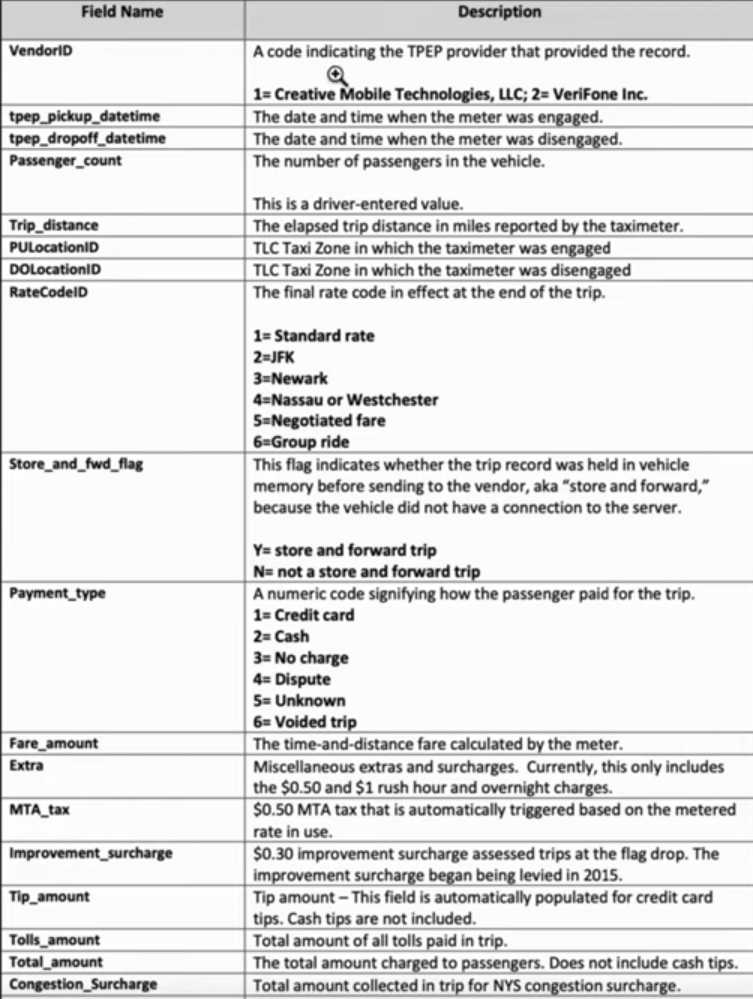

### Exploratory Data Analysis (Data Cleaning, Data Transformation, Feature Engineering)

In [4]:
df.shape  

(6405008, 18)

In [5]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [6]:
# calculating duration time from the pickup and dropiime in minutes

# converting datatypes 'object' to 'datetime'
df['tpep_pickup_datetime'] =pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] =pd.to_datetime(df['tpep_dropoff_datetime'])

In [7]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [8]:
# calculating duration: 
# subtracting the pickup time from dropoff time to get duration
# (duration = drop time - pickup time)

df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

# converting into minutes
df['duration'] = df['duration'].dt.total_seconds()/60

In [9]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


In [10]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
duration                        float64
dtype: object

There are so many columns in the dataset, but as per our problem statement,we only require some fields from the orignal data.Rest columns are nothing but the unwanted columns for this study.So we will simply remove those columns.

As the problem statement is revolving around the payment type, fare amount, and any other factor influencing the fare amount,we will filter the data to have only passenger count, trip distance,payment type,fare amount and duration of the trip.

In [11]:
# selecting wanted columns

df = df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [12]:
# filtered data
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


In [13]:
# check the missing values
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [14]:
# percentage of  missing data to the total record of the data
missing_values = (65441/len(df))*100 
print('Missing data %',round(missing_values))

Missing data % 1


In [15]:
# as the data has only 1% of data is missing so we can simply drop the records with missing values.
df.dropna(inplace=True)
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [16]:
# converting 'float' value into 'integer' of passenger_count & payment_type
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [17]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1,1,11.0,2.10,14.233333
6339563,1,1,13.0,2.13,19.000000
6339564,1,1,12.5,2.55,16.283333
6339565,1,2,8.5,1.61,9.633333


In [18]:
# check the duplicate rows
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [19]:
# 3331706 rows data isrepeating out of 6339565 rows
df.shape

(6339567, 5)

In [20]:
# removing duplicates rows as they will not contribute in analysis
df.drop_duplicates(inplace=True)
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,1,10.0,2.09,14.800000
6339561,1,1,17.5,4.11,21.500000
6339563,1,1,13.0,2.13,19.000000
6339564,1,1,12.5,2.55,16.283333


In [21]:
# after removing missing values and duplicates rows, now we have this much records left
df.shape

(3007861, 5)

In [22]:
# Filtering Catagorical data

In [23]:
# check the count distribution of passenger_count
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [24]:

df['passenger_count'].value_counts()

passenger_count
1    1750518
2     572547
3     199602
5     189305
6     118124
4     108422
0      69280
7         28
9         18
8         17
Name: count, dtype: int64

In [25]:
# payment type distribution 
df['payment_type'].value_counts(normalize=True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

We will focus solely on payments types 'card' and 'cash' denoted by 1 and 2 in the dataset.To ensure our analysis centers on these payment methods,we'll filter the data accordingly,excluding all other types.

Morever,examining the distribution of passenger counts reveals that trips with more than 5 passenger are rare.Additionally,trips with 0 passengers are impossible, as we expect at least one passenger to pay the fare amount.Therefore,we will filter the passenger count to include only values ranging from 1 to 5.

In [26]:
# removing outiers

# filtering for payment type 1 and 2
df = df[df['payment_type']<3] 

# filtering for passenger count from 1 to 2
df = df[(df['passenger_count']>0) & (df['passenger_count'] <6)]

In [27]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.618771
2    0.203503
3    0.071196
5    0.067902
4    0.038628
Name: proportion, dtype: float64

In [28]:
df.shape

(2780283, 5)

In [29]:
# replacing 1&2 into cash and card
df['payment_type'].replace([1,2],['Card','Cash'],inplace=True)
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
4,1,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000
6339564,1,Card,12.5,2.55,16.283333


In [30]:
# Numerical Data

In [31]:
# descriptive statistics for data
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


Upon reviewing the provided statistics,it's evident that the minimum values for trip distance,fare amount, and duration are negative , which is unrealistic and invalid for further analysis.Consequently, we will eliminate these negative values from the dataset

Furthermore, oserving the maximum and 50th percentile values,it's possible that the data contains significant outliers,particularly high values.These outliers need to be addressed and removed to ensure the integrity of the analysis.

In [32]:
# filtering the records for only positive values
df=df[df['fare_amount']>0]
df=df[df['trip_distance']>0]
df=df[df['duration']>0]

In [33]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,1.766835e+01,4.583313e+00,2.418261e+01
std,1.179440e+00,1.447531e+01,4.897806e+00,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.530000e+00,9.950000e+00
50%,1.000000e+00,1.300000e+01,2.770000e+00,1.575000e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.333333e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


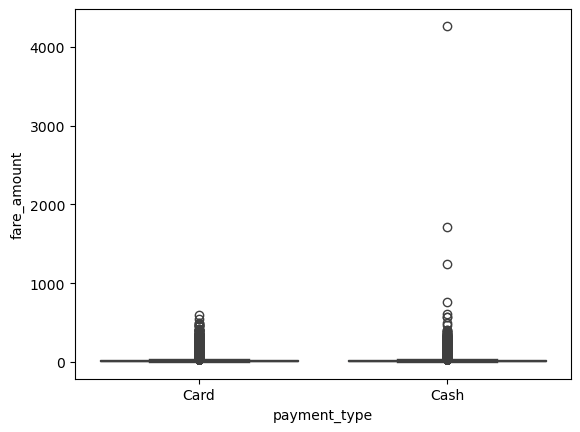

In [34]:
# check for the outliers
sns.boxplot(data=df ,y='fare_amount',x= 'payment_type')
plt.show()

(array([2.748913e+06, 1.600000e+01, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.000000e-02, 4.265090e+02, 8.530080e+02, 1.279507e+03,
        1.706006e+03, 2.132505e+03, 2.559004e+03, 2.985503e+03,
        3.412002e+03, 3.838501e+03, 4.265000e+03]),
 <BarContainer object of 10 artists>)

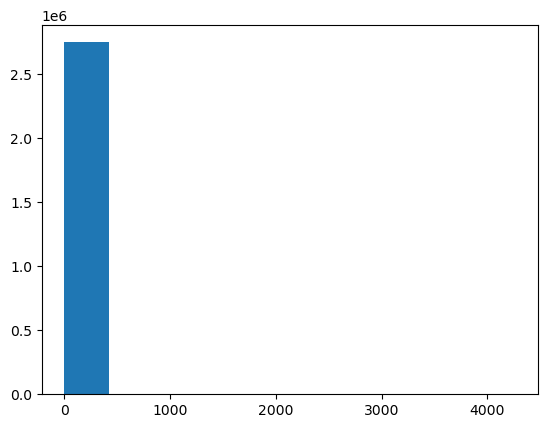

In [35]:
# checking outliers
plt.hist(df['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a07995dcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a063846f30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a063846870>],
 'medians': [<matplotlib.lines.Line2D at 0x2a0638474a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a063847740>],
 'means': []}

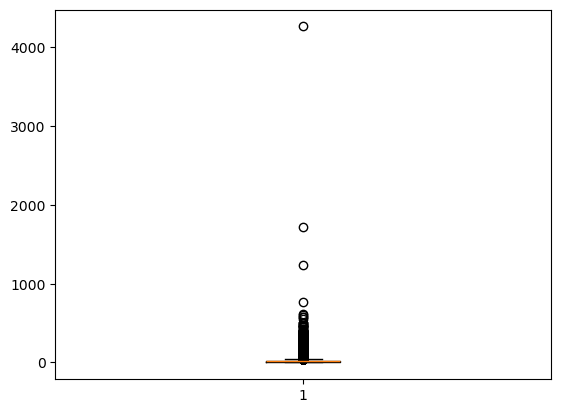

In [36]:
plt.boxplot(df['fare_amount'])

In [37]:
# removing outliers by using IQR for the numerical variables
for col in ['fare_amount','trip_distance','duration']:
    q1= df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    IQR= q3-q1

    # define lower bound and lower bounds for outliers
    lower_bound= q1-1.5*IQR
    upper_bound= q3+1.5*IQR 

    # filter out outliers
    df= df[(df[col]>= lower_bound) & (df[col]<= upper_bound)]
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


We're interested on exploring the relationship between payment type and passenger behavior concerning trip distance and fare amount.Are these variations in the distribution of payment types concerning different fare amounts or trip distances?

To investigate this,we'll plot histograms to visualize the distribution of passenger counts paying with either card or cash.This will also provide stakeholders with insight into fare amount ranges associated with different payment  methods.

(array([3.09870e+04, 4.71005e+05, 6.61351e+05, 5.11583e+05, 3.12457e+05,
        1.68037e+05, 1.12064e+05, 2.90650e+04, 1.16800e+03, 1.91000e+02]),
 array([1.0000e-02, 3.9090e+00, 7.8080e+00, 1.1707e+01, 1.5606e+01,
        1.9505e+01, 2.3404e+01, 2.7303e+01, 3.1202e+01, 3.5101e+01,
        3.9000e+01]),
 <BarContainer object of 10 artists>)

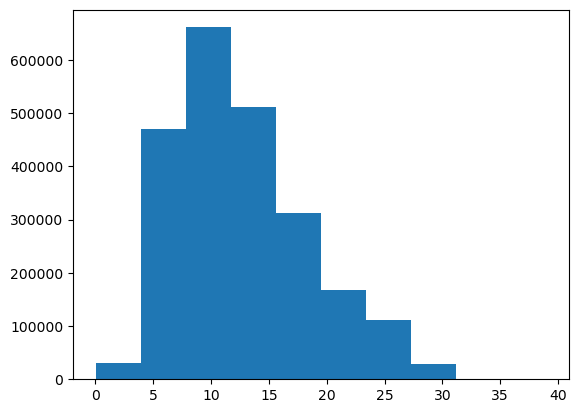

In [38]:
plt.hist(df['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a0636ef170>,
 'caps': [<matplotlib.lines.Line2D at 0x2a0636ef590>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a0636eeed0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a0636efb90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a0636efe00>],
 'means': []}

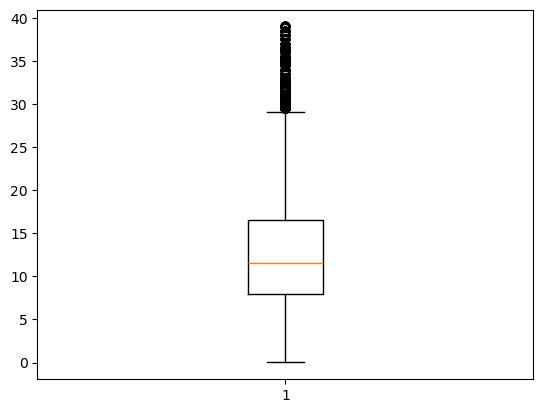

In [39]:
plt.boxplot(df['fare_amount'])

# Data Visualisation and draw data-driven conclusions

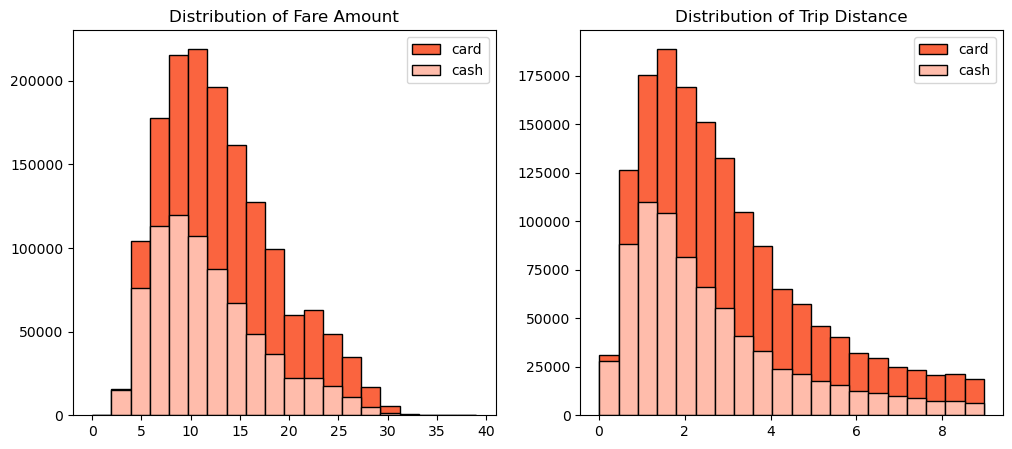

In [40]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(df[df['payment_type']== 'Card']['fare_amount'],histtype='barstacked',bins=20, edgecolor='k', color= '#FA643F',label='card')
plt.hist(df[df['payment_type']== 'Cash']['fare_amount'],histtype='barstacked',bins=20, edgecolor='k', color= '#FFBCAB',label='cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of Trip Distance')
plt.hist(df[df['payment_type']== 'Card']['trip_distance'],histtype='barstacked',bins=20, edgecolor='k', color= '#FA643F',label='card')
plt.hist(df[df['payment_type']== 'Cash']['trip_distance'],histtype='barstacked',bins=20, edgecolor='k', color= '#FFBCAB',label='cash')
plt.legend()
plt.show()

In [41]:
df.groupby('payment_type').agg({'fare_amount': ['mean', 'std'], 'trip_distance': ['mean', 'std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

Now, In order to examine the passenger's preference regarding their choice of payment method,we will assess the proportion of the two payment types.To provide a visual representation,we have opted to utilize a pie chart.This graphical depiction will offer a clear and intuitive understanding of the distribution between the two payment methods cosen by passengers

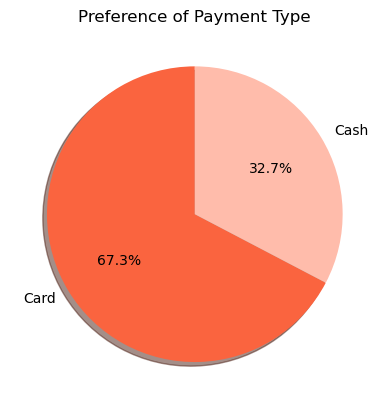

In [42]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize=True), labels= df['payment_type'].value_counts().index, 
        startangle= 90,shadow= True, autopct= '%1.1f%%', colors= ['#FA643F','#FFBCAB'])
plt.show()


Subsequently, we aim to conduct an analysis of the payment types in relation to the passenger count. Our objective is to investigate if there are any changes in preference contingent upon the number of passengers traveling in the cab.


To facilitate this examination, we have employed a visualization technique known as a stacked bar plot. This method is particularly advantageous for comparing the percentage distribution of each passenger count based on the payment method selected. Through this graphical representation, we can gain insights into potential variations in payment preferences across different passenger counts.

In [43]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


In [44]:
# calculating the total passenger count distribution based on the different payment type
passenger_count= df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count

passenger_count
payment_type passenger_count                 
Card         1                         909245
             2                         327661
             3                         122412
             4                          63676
             5                         124045
Cash         1                         460550
             2                         155472
             3                          54506
             4                          32715
             5                          47626

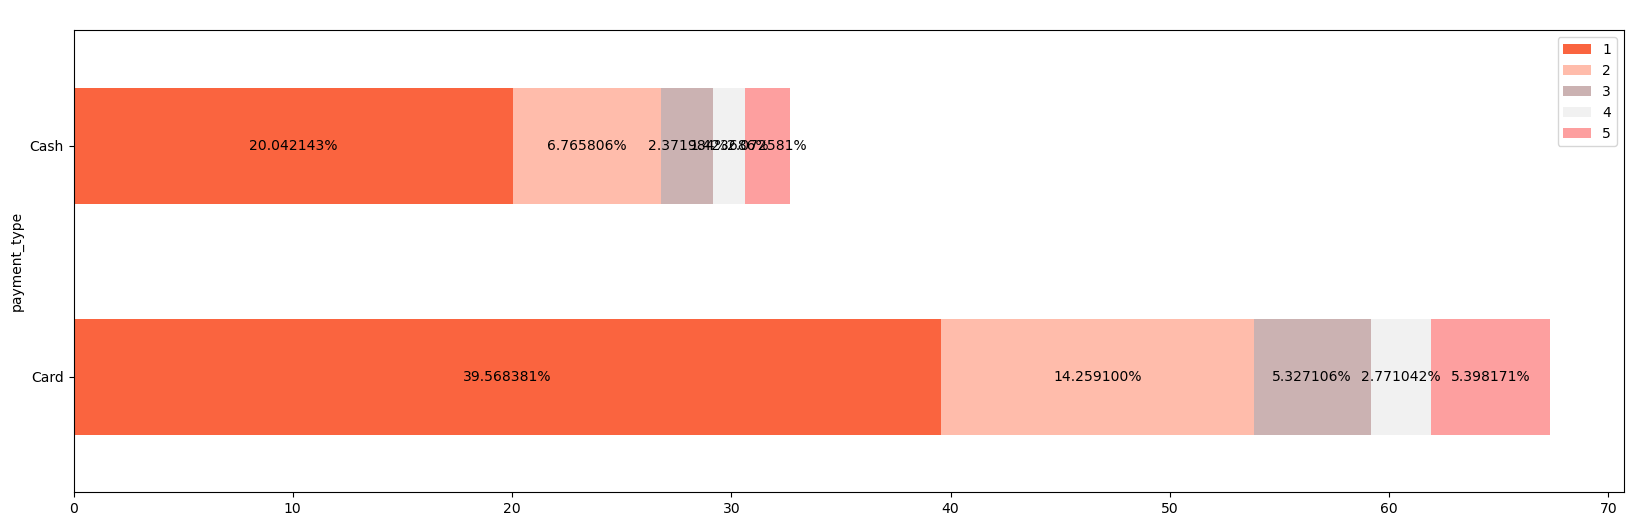

In [45]:
# renaming the passenger count to count to reset the index
passenger_count.rename(columns= {'passenger_count':'count'},inplace= True)
passenger_count.reset_index(inplace= True)

# calculating the percentage of the each passenger_count
passenger_count['percentage']= (passenger_count['count']/passenger_count['count'].sum())*100

# creating a new empty dataframe to store the distribution of each payment type (useful for the visulaization)
df1= pd.DataFrame(columns=['payment_type',1,2,3,4,5])
df1['payment_type']= ['Card','Cash']
df1.iloc[0,1:]= passenger_count.iloc[:5,-1]
df1.iloc[1,1:]= passenger_count.iloc[5:,-1]

fig, ax= plt.subplots(figsize= (20,6))
df1.plot(x= 'payment_type',kind= 'barh', stacked=True, title= ' ',ax=ax, color= ['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#FD9F9F'])

# Add percentage text
for p in ax.patches:
    width= p.get_width()
    height= p.get_height()
    x, y= p.get_xy()
    ax.text(x + width/2,
            y + height/2,
            '{:0f}%'.format(width),
            horizontalalignment= 'center',
            verticalalignment= 'center'        
           )

In [46]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


### Hypothesis Testing


In order to select the most suitable test for our scenario, our initial step involves evaluating whether the distribution of fare amounts adheres to a normal distribution. While the histogram depicted above suggests otherwise, we will further confirm this by generating a QQ plot.
    
Quantile-quantile (QQ) plots can be used to assess whether the fare amount distributions for each payment type are approximately normally distributed. If the data points closely align with the diagonal line in the plot, it suggests that the data follows a normal distribution.

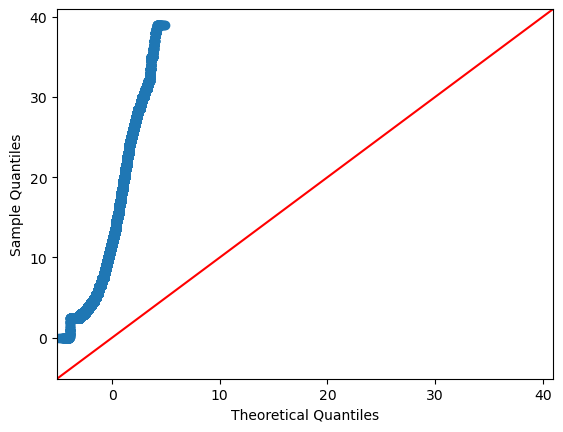

In [47]:
# create Q-Q plot with 45 degree line added to plot
fig = sm.qqplot(df['fare_amount'], line= '45')
plt.show()


The data values clearly do not follow the red 45-degree line, which is an indication that they do not follow a normal distribution. So, z distribution will not be good for this. That's why we will use T test.

Given that the T-test can be applied to both small and large samples and does not require the population standard deviation, it is a more universally applicable approach for hypothesis testing in many practical research scenarios, including analyses of taxi trip data.

In the analysis of NYC Yellow Taxi Trip Records, where you're likely dealing with an unknown population standard deviation and potentially large datasets, the T-test offers a more appropriate and flexible method for comparing means between two groups (e.g., fare amounts by payment type). It provides a reliable way to infer about the population, accommodating the uncertainty that comes with estimating population parameters from sample data.

**Null hypothesis:** There is no difference in average fare between customers who use credit cards and customers who use cash.

**Alternative hypothesis:** There is a difference in average fare between customers who use credit cards and customers who use cash

In [48]:
# sample 1
credit_card= df[df['payment_type'] == 'Card']['fare_amount']

# sample 2
cash= df[df['payment_type'] == 'Cash']['fare_amount']

# performing t-test on both the different sample
t_stat, p_value= stats.ttest_ind(a= credit_card,b= cash, equal_var= False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# comparing the p value with the significance of 5% or 0.05%
if p_value <0.05:
    print("\nReject the null hypothesis")
else:
    print("\nAccept the null hypothesis")


T-statistic: 169.2111527245052, P-value: 0.0

Reject the null hypothesis



Since the p-value is significantly smaller than the significance level of 5%, we will reject the null hypothesis.

You conclude that there is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.
    
The key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.